In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Diwali Sales Data.csv",encoding = "unicode_escape")
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [3]:
df.shape

(11251, 15)

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
df.drop(['Status','unnamed1'],axis=1,inplace=True,errors="ignore")

In [7]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(11239, 13)

In [10]:
df["Amount"] = df["Amount"].astype("int")

In [11]:
df.dtypes

User_ID              int64
Cust_name           object
Product_ID          object
Gender              object
Age Group           object
Age                  int64
Marital_Status       int64
State               object
Zone                object
Occupation          object
Product_Category    object
Orders               int64
Amount               int32
dtype: object

In [12]:
df[["Age","Orders","Amount"]].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


EXPLORIATORY  DATA ANALYSIS

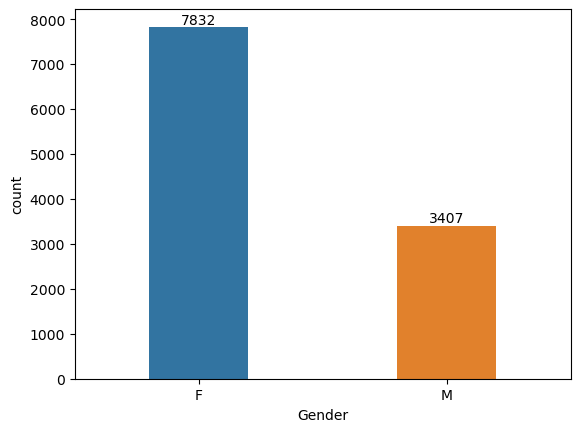

In [24]:
a = sns.countplot(x="Gender",data=df,hue = "Gender",width=0.4)
for i in a.containers:
    a.bar_label(i)
plt.show()

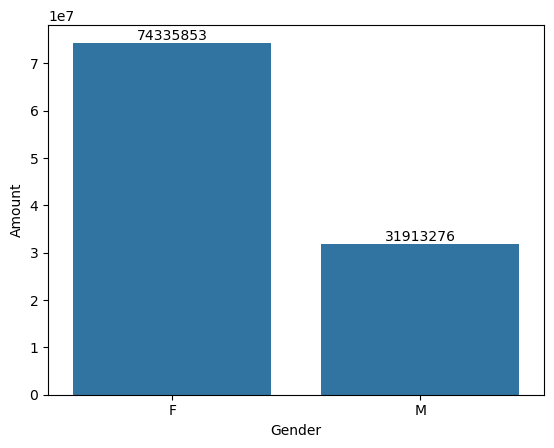

In [15]:
a = df.groupby("Gender")["Amount"].sum().reset_index()
a= a.sort_values(by ="Amount" ,ascending= False)
ax = sns.barplot(x="Gender",y="Amount",data=a)
for i in ax.containers:
    ax.bar_label(i,fmt="%.0f")
plt.show()

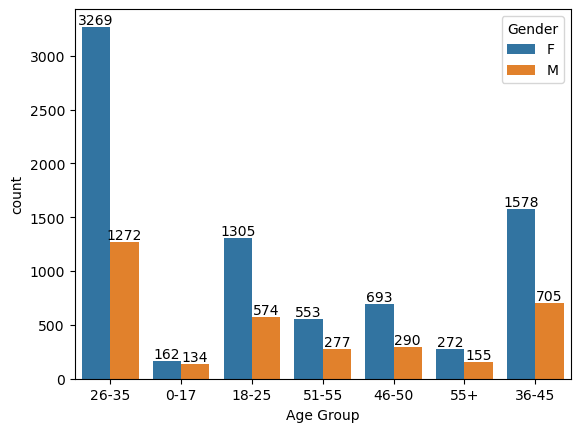

In [16]:
ax = sns.countplot(x="Age Group",data=df,hue="Gender")
for i in ax.containers:
    ax.bar_label(i)
plt.show()

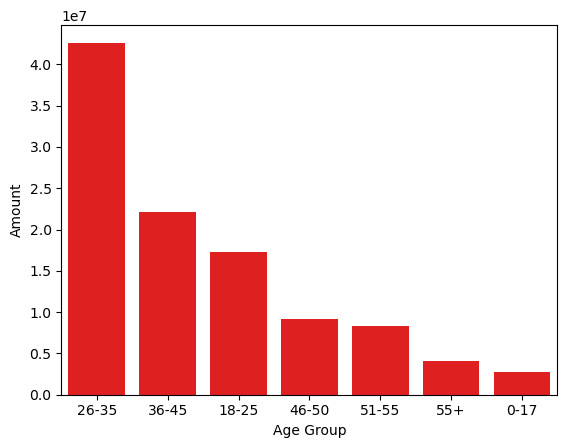

In [17]:
a = df.groupby("Age Group")["Amount"].sum().reset_index()
a= a.sort_values(by ="Amount" ,ascending= False)
sns.barplot(x="Age Group",y="Amount",data=a,color="red")
plt.show()

C:\Users\TLS\AppData\Local\Temp\ipykernel_10992\4200413032.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="State",y="Orders",data=a,palette="Set2")


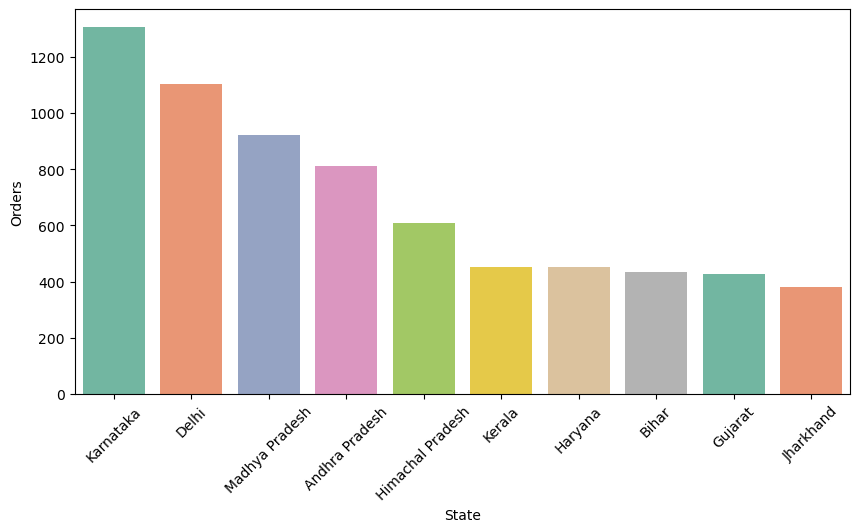

In [18]:
plt.figure(figsize=(10,5))
a = df.groupby("State")["Orders"].count().reset_index().head(10)
a= a.sort_values(by="Orders",ascending=False)
sns.barplot(x="State",y="Orders",data=a,palette="Set2")
plt.xticks(rotation=45)
plt.show()

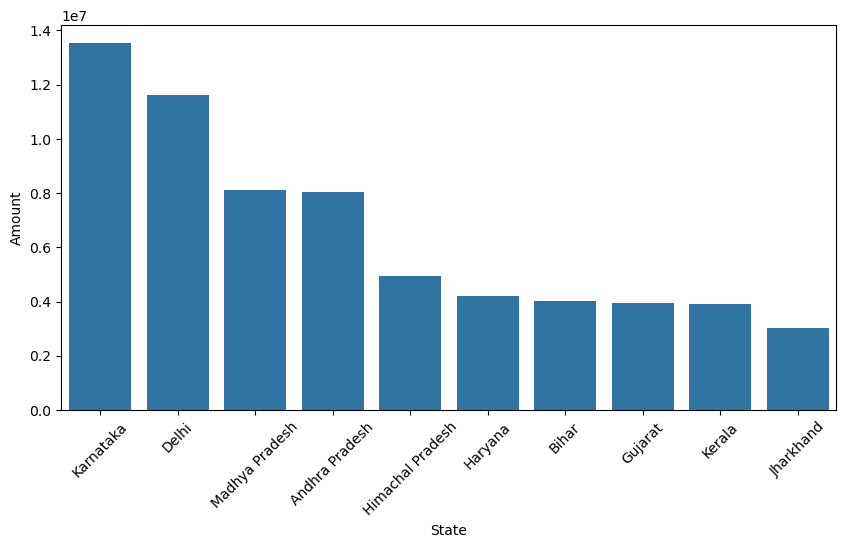

In [19]:
plt.figure(figsize=(10,5))
a = df.groupby("State")["Amount"].sum().reset_index().head(10)
a= a.sort_values(by="Amount",ascending=False)
sns.barplot(x="State",y="Amount",data=a)
plt.xticks(rotation=45)
plt.show()

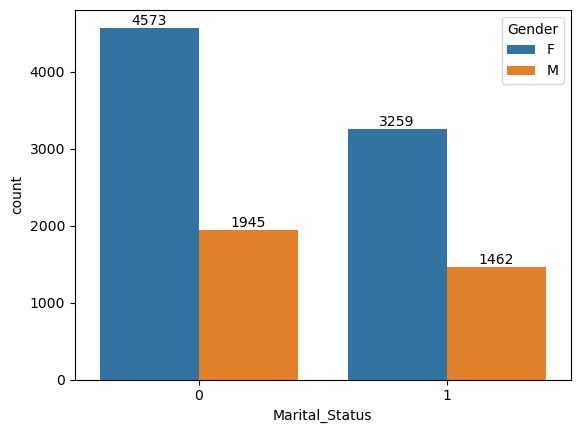

In [20]:
a =sns.countplot(x="Marital_Status",data=df, hue="Gender")
for i in a.containers:
    a.bar_label(i)
plt.show()    



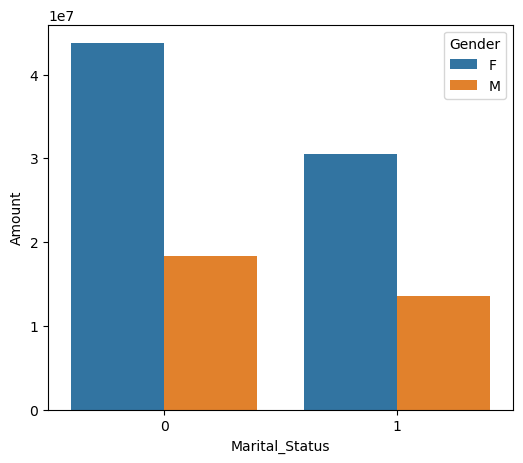

In [21]:
plt.figure(figsize=(6,5))
a = df.groupby(["Marital_Status","Gender"])["Amount"].sum().reset_index()
a= a.sort_values(by="Amount",ascending=False)
sns.barplot(x="Marital_Status" ,y="Amount",data=a,hue="Gender")
plt.show()

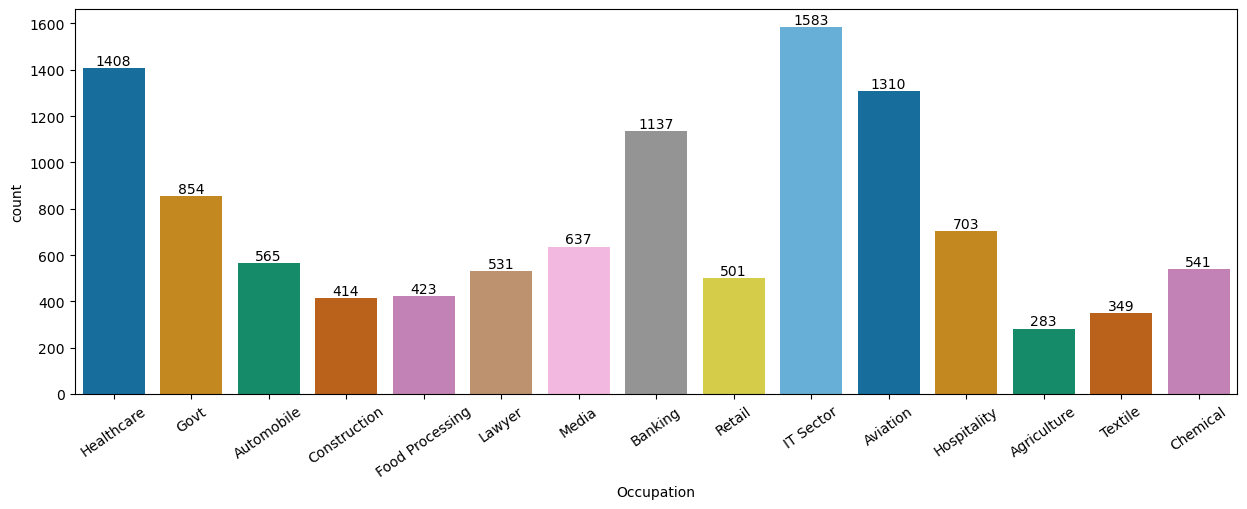

In [22]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=35)
an = sns.countplot(x="Occupation",data =df,hue="Occupation",palette="colorblind")
for i in an.containers:
    an.bar_label(i)
plt.show()

In [23]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=35)
ax = df.groupby("Occupation")["Amount"].sum().reset_index(False)
an = ax.sort_values(by = "Amount",ascending=False)
sns.barplot(x="Occupation",y="Amount",data=an,hue="Occupation",plt.xticks(rotation=35))
plt.show()

SyntaxError: positional argument follows keyword argument (3998382362.py, line 5)

In [1]:

plt.figure(figsize=(15,5))
plt.xticks(rotation=30)
a = sns.countplot(x="Product_Category",data=df,color= "green")
for i in a.containers:
    a.bar_label(i)
plt.show()

NameError: name 'plt' is not defined

In [5]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=35)
ax = df.groupby("Product_Category")["Amount"].sum().reset_index(False)
an = ax.sort_values(by = "Amount",ascending=False)
sns.barplot(x="Product_Category",y="Amount",data=an,color="skyblue")
plt.show()

NameError: name 'plt' is not defined

In [ ]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=35)
ax = df.groupby("Product_ID")["Amount"].sum().reset_index(False)
an = ax.sort_values(by = "Amount",ascending=False)
sns.barplot(x="Product_ID",y="Amount",data=an,color="skyblue")
plt.show()